### Problem Statement: 
#### Predict whether a person earns over 50k per year using the Adult dataset from the UCI Machine Learning Repository.

### Data Preprocessing

In [1]:
# Import libraries & install dependencies
!pip install xgboost
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=column_names)
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
# Check for missing values
data = data.replace(' ?', pd.NA)
data = data.dropna()


In [3]:
# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])


In [4]:
# Performing feature scaling
scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=['int64']).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


In [6]:
# Split data into training and testing sets
X = data.drop('income', axis=1)
y = data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Training


In [7]:
# Training our RandomForest model
rf = RandomForestClassifier()
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [8]:
# Training our XGBoost model
xgb = XGBClassifier()
param_grid_xgb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5)
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 200]})

### Model Evaluation

In [9]:
# RandomForest Evaluation
y_pred_rf = grid_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4503
           1       0.77      0.65      0.70      1530

    accuracy                           0.86      6033
   macro avg       0.83      0.79      0.81      6033
weighted avg       0.86      0.86      0.86      6033



In [10]:
# XGBoost Evaluation
y_pred_xgb = grid_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4503
           1       0.79      0.68      0.73      1530

    accuracy                           0.87      6033
   macro avg       0.84      0.81      0.82      6033
weighted avg       0.87      0.87      0.87      6033



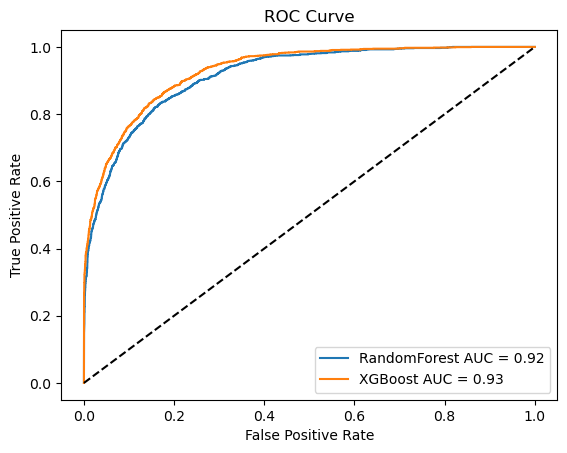

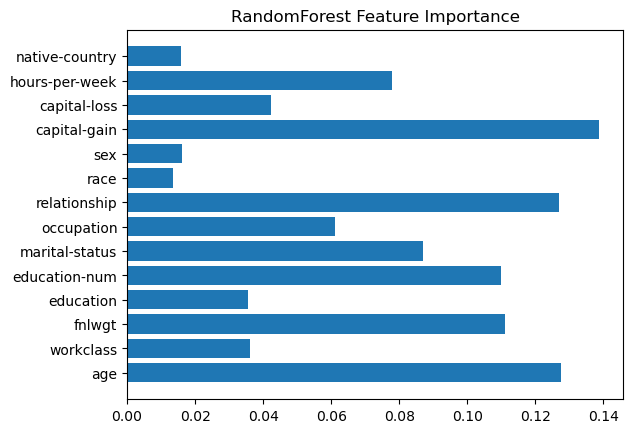

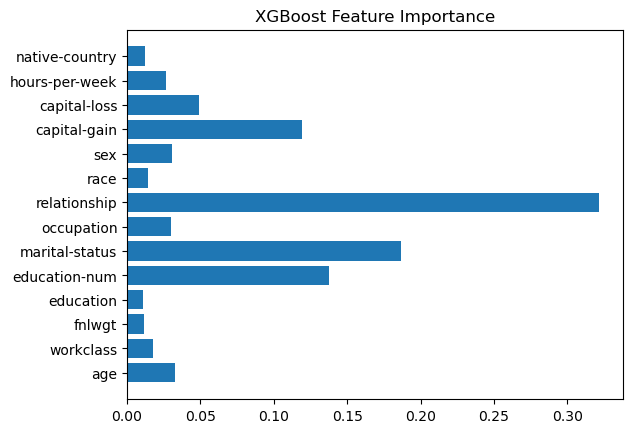

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# ROC curve for RandomForest
rf_fpr, rf_tpr, _ = roc_curve(y_test, grid_rf.predict_proba(X_test)[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)
plt.plot(rf_fpr, rf_tpr, label=f'RandomForest AUC = {rf_auc:.2f}')

# ROC curve for XGBoost
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, grid_xgb.predict_proba(X_test)[:, 1])
xgb_auc = auc(xgb_fpr, xgb_tpr)
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost AUC = {xgb_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Feature importance for RandomForest
rf_importances = grid_rf.best_estimator_.feature_importances_
plt.barh(X.columns, rf_importances)
plt.title('RandomForest Feature Importance')
plt.show()

# Feature importance for XGBoost
xgb_importances = grid_xgb.best_estimator_.feature_importances_
plt.barh(X.columns, xgb_importances)
plt.title('XGBoost Feature Importance')
plt.show()

### Comparative Analysis

**Random Forest**:
- **Performance**: The Random Forest model achieved an accuracy of 86%. The precision for class 0 (majority class) was 0.89, while for class 1 it was 0.77. Recall was 0.94 for class 0 and 0.65 for class 1. The F1-score, which balances precision and recall, was 0.91 for class 0 and 0.71 for class 1.
- **Strengths**:
  - **Robustness**: It handles a large number of features well and is less prone to overfitting due to the ensemble approach.
  - **Interpretability**: Feature importance can be extracted, making it easier to understand the influence of each feature.
- **Weaknesses**:
  - **Speed**: Training can be slower with many estimators.
  - **Memory Usage**: It can consume more memory, especially with large datasets.

**XGBoost**:
- **Performance**: The XGBoost model had an accuracy of 87%, slightly higher than Random Forest. Precision for class 0 was 0.90 and 0.79 for class 1. Recall was 0.94 for class 0 and 0.68 for class 1. The F1-score was 0.92 for class 0 and 0.73 for class 1.
- **Strengths**:
  - **Efficiency**: Generally faster training times compared to Random Forest.
  - **Performance**: Often achieves higher accuracy and better handling of imbalanced datasets.
  - **Flexibility**: Offers a variety of hyperparameters to tune, improving model performance.
- **Weaknesses**:
  - **Complexity**: More parameters to tune, which can be challenging for beginners.
  - **Interpretability**: While feature importance is available, the model is generally less interpretable than Random Forest.




### Conclusion

In conclusion, the visualizations were instrumental in comparing the performance of Random Forest and XGBoost classifiers. The ROC curves, accuracy scores, and feature importance plots collectively demonstrated that XGBoost is the superior model for predicting income levels in this dataset. The model's ability to utilize boosting techniques provided it with an edge in capturing complex data patterns, as seen in the ROC curve's closer proximity to the ideal model performance.

Future work could involve exploring other boosting algorithms or ensemble methods and further tuning the hyperparameters to enhance model performance, potentially visualized with more in-depth analysis plots.